In [1]:
import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [2]:
train_file = "../data/smsspamcollection/SMSSpamCollection.txt"

df_train = pd.read_csv(train_file, sep="\t", header=None, names=["label", "text"])
l_train = len(df_train)
print("Length of training data: %d"%(l_train))


Length of training data: 5572


In [3]:
df_train.text = df_train.text.str.lower()
df_train.label = df_train.label.str.lower()

In [4]:
null_check = df_train.isna().sum()
print("Null check on training data:")
print(null_check)


Null check on training data:
label    0
text     0
dtype: int64


In [5]:
print("Original data:")
df_train.head(5)

Original data:


,label,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [6]:
df_train.fillna(-1, inplace=True)
print("New data (after filling NaN by -1):")
df_train.head(5)

New data (after filling NaN by -1):


,label,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [7]:
print("Label distribution of training data:")
print((df_train.label.value_counts()/l_train))

Label distribution of training data:
ham     0.865937
spam    0.134063
Name: label, dtype: float64


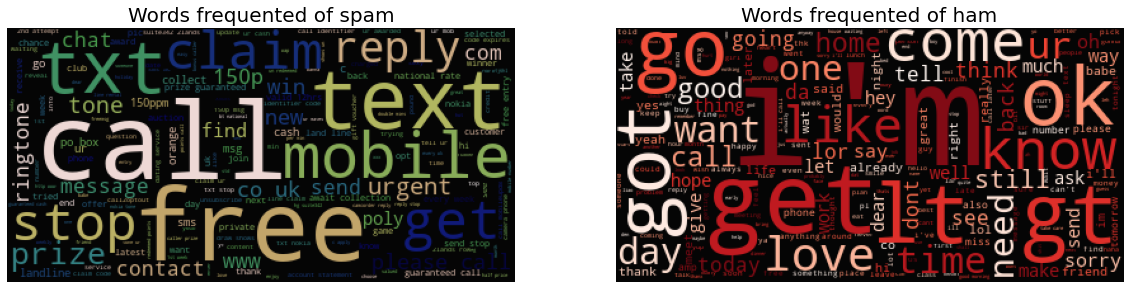

In [8]:
%matplotlib inline

dataset = df_train
eng_stopwords = set(stopwords.words("english"))

plt.figure(figsize=(20,20))
plt.subplot(121)
sub_text=dataset[dataset.label=="spam"].text.values
subwc= WordCloud(background_color="black",max_words=2000,stopwords=eng_stopwords)
subwc.generate(" ".join(sub_text))
plt.axis("off")
plt.title("Words frequented of spam", fontsize=20)
plt.imshow(subwc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

plt.subplot(122)
non_text=dataset[dataset.label=="ham"].text.values
nonwc= WordCloud(background_color="black",max_words=2000,stopwords=eng_stopwords)
nonwc.generate(" ".join(non_text))
plt.axis("off")
plt.title("Words frequented of ham", fontsize=20)
plt.imshow(nonwc.recolor(colormap= 'Reds' , random_state=244), alpha=0.98)

In [9]:
from collections import Counter
c_sub = Counter()
for sent in sub_text:
    c_sub.update(sent.split())
    
c_non = Counter()
for sent in non_text:
    c_non.update(sent.split())


In [10]:
inter_words = set(c_non).intersection(set(c_sub))
inter_words.difference_update(eng_stopwords)
print("Common words use in both: %d"%(len(inter_words)))
inter_words

Common words use in both: 1016


{'pin',
 'sign',
 'charge',
 'over!',
 'maybe',
 'congrats',
 'ladies',
 'b',
 'park',
 'u',
 'easy,',
 'dates',
 'wk',
 'more?',
 'lotr',
 'fall',
 'pm.',
 'soiree',
 'round',
 "i've",
 'me.',
 'starts',
 'spanish',
 '-',
 '2moro',
 'ok',
 'mr.',
 'pics',
 'surprise',
 'symbol',
 'accident',
 'potential',
 'break',
 'season',
 'text.',
 'over?',
 'to?',
 'touch',
 'id',
 'post',
 '2morro',
 'one',
 'leave',
 'box',
 'become',
 'answer',
 'nothing',
 'today!',
 'pick',
 'eye',
 'thurs',
 'game.',
 'us',
 'anyone',
 '3g',
 'plus',
 'fun',
 'married',
 'need',
 'simple',
 'waiting',
 'cinema',
 'exciting',
 'another',
 'sn',
 'is?',
 'messages',
 'night,',
 'baby!',
 'line',
 'good',
 'downloaded',
 'numbers',
 'price',
 'take',
 'pass',
 'down?',
 '10',
 'two',
 'yes!',
 'hubby',
 'idiot',
 '20',
 'started',
 'ready!',
 'bloke',
 '6.',
 'cm',
 'may',
 'accordingly.',
 'colour',
 'requests',
 'now,',
 'tried',
 'things',
 'listening',
 'costs',
 'also',
 'now.',
 'along',
 'baby',
 'yo',

In [11]:
sus_wd = []
for wd in inter_words:
    if c_sub[wd] >= c_non[wd]*3:
        sus_wd.append(wd)
sus_wd

['box',
 'today!',
 'line',
 'numbers',
 'price',
 'colour',
 'tried',
 'costs',
 'unlimited',
 'live.',
 'chat',
 'summer',
 'biggest',
 'now!',
 'double',
 "u've",
 'discount',
 'draw',
 'video',
 'currently',
 'laid',
 'await',
 'information',
 'contact',
 'win',
 'offers',
 'shows',
 'customer',
 'service',
 'del',
 'sam',
 'charge.',
 'calls.',
 '1000s',
 'services',
 'holiday',
 'local',
 'apply',
 'cash',
 'friend.',
 'phones',
 'brand',
 'terms',
 's.',
 'gift',
 'replying',
 'latest',
 'goto',
 'text?',
 'comp',
 'camera',
 'reply',
 'wk.',
 'guys.',
 'landline',
 'congratulations',
 'info',
 'subs',
 'receive',
 'txt',
 'review',
 'network',
 'collect',
 'week!',
 'anytime',
 'enter',
 'sms.',
 'cd',
 'nokia',
 'direct',
 '&',
 'free',
 'activate',
 '100',
 'stop',
 'worth',
 'rates',
 'luck!',
 'po',
 'truly',
 'sky',
 'final',
 'original',
 'selected',
 'orange',
 'voucher',
 'questions.',
 'txting',
 'pounds',
 'purchase',
 'award',
 'store',
 'todays',
 'app',
 'code',
 '

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
traindev = df_train[["text","label"]].sample(frac=1,random_state=1).reset_index(drop=True)
#train, dev, test = np.split(traindev, [int(.6*len(df)), int(.8*len(df))])
train, dev = train_test_split(traindev, test_size=0.3)
train = train.reset_index(drop=True)
dev = dev.reset_index(drop=True)

In [13]:
train.to_csv("../data/smsspamcollection/train.csv", index=False)
dev.to_csv("../data/smsspamcollection/test.csv", index=False)

In [14]:
dev.head(10)

,text,label
0,we stopped to get ice cream and will go back a...,ham
1,say thanks2.,ham
2,great new offer - double mins & double txt on ...,spam
3,i'm coming back on thursday. yay. is it gonna ...,ham
4,i finished my lunch already. u wake up already?,ham
5,no you'll just get a headache trying to figure...,ham
6,u guys never invite me anywhere :(,ham
7,i'm really not up to it still tonight babe,ham
8,i'm vivek:)i got call from your number.,ham
9,thanx. yup we coming back on sun. finish dinne...,ham


In [15]:
def pieplt(data):
    print("Print len of data: %d"%len(data))
    labels = data["label"].value_counts()
    plt.figure(figsize=(10,10))
    labels.plot.pie(autopct='%.2f')

Print len of data: 3900


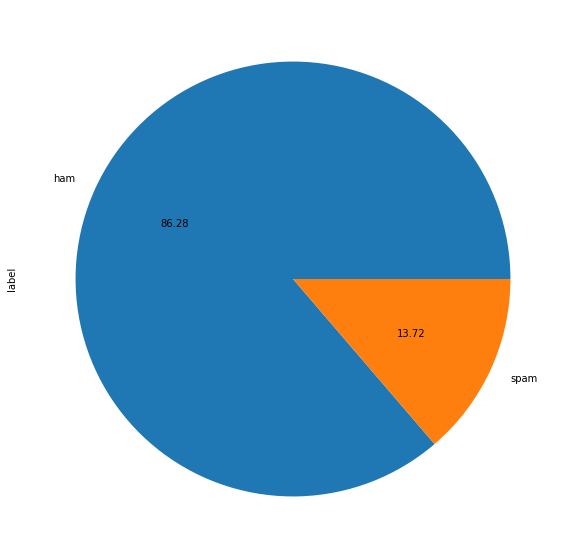

In [16]:
pieplt(train)

Print len of data: 1672


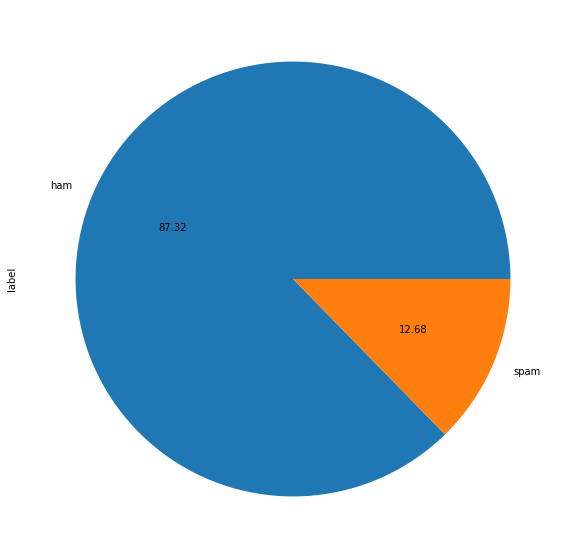

In [17]:
pieplt(dev)